In [1]:
from src.model import PyTradeShifts
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns   
import country_converter as coco

In [2]:
print(os.getcwd())
# Go up one directory to get to the data folder
data_dir = os.path.join(os.path.dirname(os.getcwd()))
os.chdir(data_dir)
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts/scripts
/home/florian/Documents/GitHub/pytradeshifts


In [3]:
ISIMIP = pd.read_csv("." + "/data/scenario_files/ISIMIP_wheat_Hedlung.csv", index_col=0)

In [4]:
ISIMIP.head()


,yield_change
name,
Indonesia,NaN
Malaysia,NaN
Chile,32.358411
Bolivia,2.438740
Peru,54.821289


In [5]:
ISIMIP.columns

Index(['yield_change'], dtype='object')

In [6]:
nan_indices = ISIMIP.index[ISIMIP.iloc[:, 0].isnull()].tolist()

In [7]:
nan_indices

['Indonesia',
 'Malaysia',
 'Suriname',
 'Guyana',
 'Costa Rica',
 'Nicaragua',
 'Congo, Rep. of',
 'Congo, Democratic Republic of',
 'Namibia',
 'Saint-Martin (Fr.)',
 'Sint Maarten (Neth.)',
 'Cambodia',
 'United Arab Emirates',
 'Sierra Leone',
 'Guinea',
 'Liberia',
 'Central African Republic',
 'Djibouti',
 "Côte d'Ivoire",
 'Senegal',
 'Benin',
 'Angola',
 'Qatar',
 'Haiti',
 'Dominican Republic',
 'Chad',
 'El Salvador',
 'Timor-Leste',
 'Brunei Darussalam',
 'Mozambique',
 'eSwatini',
 'Guantanamo Bay (US)',
 'Cuba',
 'Honduras',
 'Cameroon',
 'Gabon',
 'Burkina Faso',
 'Togo',
 'Ghana',
 'Guinea-Bissau',
 'Gibraltar (UK)',
 'Belize',
 'Panama',
 'Venezuela, Republica Bolivariana de',
 'Papua New Guinea',
 'Mauritania',
 'Equatorial Guinea',
 'Gambia, The',
 'Hong Kong (SAR, China)',
 'Greenland (Den.)',
 'Fiji',
 'New Caledonia (Fr.)',
 'Madagascar',
 'Philippines',
 'Sri Lanka',
 'Curaçao (Neth.)',
 'Aruba (Neth.)',
 'Bahamas, The',
 'Turks and Caicos Islands (UK)',
 'Saint-P

In [8]:
type(nan_indices)

list

In [9]:
Wheat2018 = PyTradeShifts("Wheat", 2018, region="Global", testing=True, countries_to_remove=nan_indices)

In [10]:
Wheat2018.load_data()

Loaded data for Wheat in Y2018.


In [11]:
Wheat2018.remove_countries()

In [12]:
Wheat2018.remove_net_zero_countries()

In [13]:
Wheat2018.prebalance()

In [14]:
Wheat2018.correct_reexports()

In [15]:
Wheat2018.remove_below_percentile()

Removed countries with trade below the 75th percentile.


In [16]:
Wheat2018.build_graph()

In [17]:
Wheat2018.find_trade_communities()

Removed community {'Bhutan'} with only one country.
Removed community {'Niger'} with only one country.


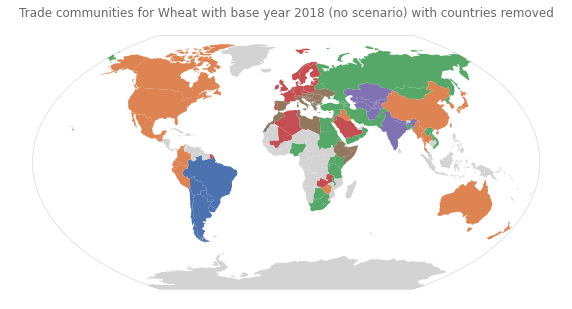

In [18]:
Wheat2018.plot_trade_communities()